In [714]:
from pathlib import Path
from tab_hero.dataio.tab_format import load_tab
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [662]:
dir_root = Path().cwd().parent.parent
dir_preprocessed_data = dir_root / 'data' / 'processed'

View preprocessed tab data

In [663]:
for i, tab_file in enumerate(dir_preprocessed_data.glob('*.tab')):
    print(tab_file)
    
    tab_data = load_tab(tab_file)
    
    print(tab_data)
    
    if i == 10:
        break

e:\Python Projects\tab-hero\data\processed\00025e292bfacc9b.tab
TabData(mel_spectrogram=array([[-2.8632812, -2.8632812, -2.8632812, ..., -2.8632812, -2.8632812,
        -2.8632812],
       [-2.8632812, -2.8632812, -2.8632812, ..., -2.8632812, -2.8632812,
        -2.8632812],
       [-2.8632812, -2.8632812, -2.8632812, ..., -2.8632812, -2.8632812,
        -2.8632812],
       ...,
       [-2.8632812, -2.8632812, -2.8632812, ..., -2.8632812, -2.8632812,
        -2.8632812],
       [-2.8632812, -2.8632812, -2.8632812, ..., -2.8632812, -2.8632812,
        -2.8632812],
       [-2.8632812, -2.8632812, -2.8632812, ..., -2.8632812, -2.8632812,
        -2.8632812]], shape=(128, 32688), dtype=float32), sample_rate=22050, hop_length=256, note_tokens=array([  1, 439, 505, ..., 631, 655,   2], shape=(1250,), dtype=int16), difficulty_id=0, instrument_id=2, content_hash='00025e292bfacc9b', genre_id=1, song_id=3809)
e:\Python Projects\tab-hero\data\processed\0003cad26b028e39.tab
TabData(mel_spectrogram

In [664]:
for i, tab_file in enumerate(dir_preprocessed_data.iterdir()):
    print(tab_file)
    
    if i == 10:
        break

e:\Python Projects\tab-hero\data\processed\.mel_cache
e:\Python Projects\tab-hero\data\processed\.progress_manifest.json
e:\Python Projects\tab-hero\data\processed\00025e292bfacc9b.tab
e:\Python Projects\tab-hero\data\processed\0003cad26b028e39.tab
e:\Python Projects\tab-hero\data\processed\00044d42d97be12d.tab
e:\Python Projects\tab-hero\data\processed\0005aa02866dddf6.tab
e:\Python Projects\tab-hero\data\processed\0005cc1d3cbc5253.tab
e:\Python Projects\tab-hero\data\processed\00068c50bf7a2a95.tab
e:\Python Projects\tab-hero\data\processed\0006ec38aac643a5.tab
e:\Python Projects\tab-hero\data\processed\000964b8f367c35e.tab
e:\Python Projects\tab-hero\data\processed\000bd4b91be58246.tab


In [665]:
pd.set_option('display.max_columns', None)

In [666]:
sample_100 = pd.read_csv(dir_root / 'sample_features.csv').sort_values(by='song_id')
sample_100

,content_hash,difficulty_id,instrument_id,genre_id,song_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
74,47eeb854c2a69d56,0,2,1,322,163.363991,1.569240,0.451045,0.013296,2.587504,2.574208,99.384014,1.569240,0.451045,52.368206,125,0.765163,1244.354839,770.937052,1200.0,600.0,1200.0,0.336000,0.016000,0.692372,1.000000,0.200000,0.000000
6,e924eea23ea77a15,1,2,7,370,301.116372,1.751260,0.645892,0.068585,3.073434,3.004850,161.499023,1.751260,0.645892,47.940368,552,1.833178,438.802178,400.848939,370.0,370.0,370.0,0.112319,0.380435,1.438621,0.996377,0.123188,0.000000
0,237b10b35cabd811,2,0,1,472,179.350930,2.334718,0.695964,0.006338,3.727419,3.721081,123.046875,2.334718,0.695964,45.125053,378,2.107600,434.641910,482.719355,320.0,160.0,320.0,0.108466,0.148148,1.320973,0.000000,0.169312,0.000000
7,e78fe96c3ad65293,1,0,5,515,207.075556,1.774428,0.618449,0.006738,3.239375,3.232637,161.499023,1.774428,0.618449,53.026571,422,2.037904,471.520190,377.532390,370.0,370.0,370.0,0.066351,0.616114,1.359151,0.000000,0.139810,0.000000
91,dc96c598e1e23f8f,2,2,2,628,231.293968,1.515922,0.446119,0.027122,2.372350,2.345228,112.347147,1.515922,0.446119,54.638899,813,3.515007,254.359606,228.194798,170.0,170.0,350.0,0.029520,0.341943,1.345560,0.000000,0.111931,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,ab340ef876ae6e26,2,2,1,6702,196.011247,1.765618,0.455689,0.028758,3.459470,3.430711,147.656250,1.765618,0.455689,53.057743,558,2.846775,337.199282,313.168870,200.0,200.0,410.0,0.057348,0.426523,1.501688,0.000000,0.258065,0.014337
39,0208c2b4e58d0c81,1,0,3,6728,291.561361,1.504532,0.530520,0.071736,2.391033,2.319297,103.359375,1.504532,0.530520,56.869233,605,2.075035,431.357616,243.526406,380.0,380.0,380.0,0.004959,0.980165,1.354966,0.000000,0.099174,0.000000
40,84c1d9a8207ef014,0,0,12,6749,172.942222,1.870214,1.012995,0.113964,4.809110,4.695146,123.046875,1.870214,1.012995,50.941792,133,0.769043,1149.242424,677.088935,1005.0,740.0,1230.0,0.015038,0.000000,1.160769,0.000000,0.082707,0.000000
25,086cc80aa2543992,3,2,2,6933,269.897143,1.647391,0.445084,0.086530,2.550247,2.463718,109.956782,1.647391,0.445084,53.073522,1332,4.935213,190.646131,230.638620,130.0,130.0,140.0,0.113363,0.160661,1.551042,0.488739,0.000000,0.511261


In [667]:
for col in sample_100.columns:
    print(col)

content_hash
difficulty_id
instrument_id
genre_id
song_id
duration_sec
rms_energy_mean
rms_energy_std
amplitude_envelope_min
amplitude_envelope_max
amplitude_envelope_range
tempo_bpm
mel_rms_mean
mel_rms_std
spectral_centroid_mean
n_notes
notes_per_second_mean
inter_note_ms_mean
inter_note_ms_std
inter_note_ms_median
inter_note_ms_p25
inter_note_ms_p75
sustain_ratio
chord_ratio
fret_entropy
hopo_ratio
star_power_ratio
tap_ratio


In [668]:
full = pd.read_csv(dir_root / 'features.csv')
full.head(100)

,content_hash,difficulty_id,instrument_id,genre_id,song_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,00068c50bf7a2a95,0,2,7,3631,163.480091,1.891090,1.430148,0.402069,4.052784,3.650716,143.554688,1.891090,1.430148,55.777028,96,0.587227,994.736842,742.686223,830.0,820.0,830.0,0.041667,0.000000,1.107923,0.000000,0.104167,0.000000
1,00044d42d97be12d,0,2,4,1694,194.292971,1.687803,0.795066,0.098820,2.682918,2.584098,112.347147,1.687803,0.795066,51.654273,148,0.761736,1254.829932,564.478392,1060.0,1050.0,1085.0,0.378378,0.000000,0.986289,0.000000,0.189189,0.000000
2,000964b8f367c35e,1,0,1,2603,234.289342,1.612189,0.821523,0.178069,3.146025,2.967956,139.674831,1.612189,0.821523,59.742395,251,1.071325,722.640000,571.584666,530.0,420.0,850.0,0.294821,0.406375,1.468277,0.996016,0.258964,0.000000
3,0006ec38aac643a5,0,0,1,2614,234.033923,1.715760,0.565870,0.134545,2.594404,2.459859,139.674831,1.715760,0.565870,49.109248,156,0.666570,1337.419355,430.661665,1270.0,880.0,1705.0,0.153846,0.000000,1.131019,0.993590,0.224359,0.000000
4,0005cc1d3cbc5253,2,1,3,340,247.118367,3.104284,1.243821,0.271522,6.126035,5.854513,117.453835,3.104284,1.243821,34.718610,420,1.699590,529.451074,580.585199,250.0,250.0,510.0,0.111905,0.690476,1.583723,0.990476,0.119048,0.002381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0082139b1aedc2f1,2,0,1,6738,207.377415,1.687693,0.816365,0.109384,3.047493,2.938109,123.046875,1.687693,0.816365,53.583222,346,1.668456,528.869565,440.972112,240.0,240.0,960.0,0.049133,0.274566,1.416768,0.000000,0.112717,0.147399
96,0081bd1ab8ec75f0,3,0,3,2451,345.327166,1.588202,0.412583,0.036142,2.074820,2.038678,120.185320,1.588202,0.412583,52.458733,1207,3.495236,261.791045,209.461386,160.0,160.0,330.0,0.167357,0.349627,1.531770,0.990058,0.096935,0.009114
97,0085a4f150fd3a93,0,3,8,6034,230.330340,2.201571,1.157041,0.052586,6.374375,6.321790,123.046875,2.201571,1.157041,46.057842,211,0.916076,1021.333333,620.615772,960.0,720.0,1200.0,0.241706,0.000000,1.145157,0.000000,0.184834,0.009479
98,008881880a51dd3b,1,2,1,4863,210.001270,1.656396,0.519947,0.058778,2.412222,2.353444,151.999081,1.656396,0.519947,52.640956,415,1.976179,480.362319,311.669362,390.0,380.0,390.0,0.115663,0.272289,1.344770,0.000000,0.120482,0.000000


In [669]:
full.loc[full.song_id == 1, 'difficulty_id']

2579     3
36520    3
Name: difficulty_id, dtype: int64

Save and remove validation information

In [670]:
validation_df = full.loc[:, ['song_id', 'content_hash', 'genre_id']].drop_duplicates().sort_values(by='song_id')
validation_df

,song_id,content_hash,genre_id
2579,1,0c97fc5477d68ce4,1
36520,1,aef66f85c7c25a75,1
31815,2,98525b0874047934,1
53060,3,fe745ba605aa02d7,4
43658,3,d19feff63b213786,4
...,...,...,...
48786,6947,e9f3ff9d0889481e,1
7410,6947,24026653c3593c70,1
7814,6947,26096170569f02f9,1
38233,6947,b7375e466c0c92c9,1


In [671]:
full.drop(['content_hash', 'genre_id'], axis=1, inplace=True)
full

,difficulty_id,instrument_id,song_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,0,2,3631,163.480091,1.891090,1.430148,0.402069,4.052784,3.650716,143.554688,1.891090,1.430148,55.777028,96,0.587227,994.736842,742.686223,830.0,820.0,830.0,0.041667,0.000000,1.107923,0.000000,0.104167,0.000000
1,0,2,1694,194.292971,1.687803,0.795066,0.098820,2.682918,2.584098,112.347147,1.687803,0.795066,51.654273,148,0.761736,1254.829932,564.478392,1060.0,1050.0,1085.0,0.378378,0.000000,0.986289,0.000000,0.189189,0.000000
2,1,0,2603,234.289342,1.612189,0.821523,0.178069,3.146025,2.967956,139.674831,1.612189,0.821523,59.742395,251,1.071325,722.640000,571.584666,530.0,420.0,850.0,0.294821,0.406375,1.468277,0.996016,0.258964,0.000000
3,0,0,2614,234.033923,1.715760,0.565870,0.134545,2.594404,2.459859,139.674831,1.715760,0.565870,49.109248,156,0.666570,1337.419355,430.661665,1270.0,880.0,1705.0,0.153846,0.000000,1.131019,0.993590,0.224359,0.000000
4,2,1,340,247.118367,3.104284,1.243821,0.271522,6.126035,5.854513,117.453835,3.104284,1.243821,34.718610,420,1.699590,529.451074,580.585199,250.0,250.0,510.0,0.111905,0.690476,1.583723,0.990476,0.119048,0.002381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53378,3,0,5780,129.253878,1.835907,1.023463,0.092652,4.028858,3.936206,161.499023,1.835907,1.023463,51.449279,259,2.003808,434.418605,380.415739,360.0,180.0,540.0,0.687259,0.428571,1.499671,0.000000,0.463320,0.038610
53379,3,3,3669,334.007438,3.953154,9.744330,0.719922,46.324757,45.604835,139.674831,3.953154,9.744330,61.474296,28,0.083830,1220.000000,1296.593828,580.0,260.0,1720.0,0.785714,0.571429,1.546883,0.000000,0.392857,0.000000
53380,3,1,3318,177.412063,1.825002,0.562484,0.111541,2.465936,2.354395,143.554688,1.825002,0.562484,45.329598,737,4.154171,209.103261,65.358628,200.0,200.0,200.0,0.005427,0.000000,1.566092,0.000000,0.157395,0.020353
53381,1,2,611,219.660771,1.853570,0.416575,0.003025,3.085214,3.082189,117.453835,1.853570,0.416575,49.147641,233,1.060726,810.172414,608.333624,680.0,510.0,892.5,0.141631,0.922747,1.309585,0.000000,0.218884,0.000000


Confirm which columns contain consistent values across each song-instrument set (set of difficulties)

In [672]:
songs = full.song_id.unique()
instruments = np.arange(0, 4)
difficulties = np.arange(0, 4)

num_songs_and_instruments = len(full.loc[:, ['song_id', 'instrument_id']].drop_duplicates())
print(num_songs_and_instruments)

consistent_cols = ['song_id', 'instrument_id']

for col in full.columns:
    
    if col in consistent_cols:
        continue
    
    cols_to_check = consistent_cols + [col]
    
    curr_n_rows = len(full.loc[:, cols_to_check].drop_duplicates())
    
    if curr_n_rows == num_songs_and_instruments:
        consistent_cols.append(col)

print(consistent_cols)

full.loc[:, consistent_cols].drop_duplicates().sort_values(by=['song_id', 'instrument_id'])

14059
['song_id', 'instrument_id', 'duration_sec', 'rms_energy_mean', 'rms_energy_std', 'amplitude_envelope_min', 'amplitude_envelope_max', 'amplitude_envelope_range', 'tempo_bpm', 'mel_rms_mean', 'mel_rms_std', 'spectral_centroid_mean']


,song_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean
2579,1,0,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942
36520,1,2,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942
31815,2,0,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545
53060,3,0,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235
43658,3,2,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235
...,...,...,...,...,...,...,...,...,...,...,...,...
11480,6946,1,519.418776,2.341415,0.794711,0.275529,3.484388,3.208859,105.468750,2.341415,0.794711,36.879245
47347,6946,2,519.418776,1.692970,0.476703,0.056970,2.968671,2.911701,105.468750,1.692970,0.476703,53.982015
5088,6947,0,260.794921,1.746991,0.615512,0.088409,3.028933,2.940524,135.999178,1.746991,0.615512,47.560377
7410,6947,1,260.794921,2.632053,0.898390,0.227976,5.149873,4.921897,135.999178,2.632053,0.898390,35.320079


Confirm the number of difficulties is the same for each instrument in a song

In [673]:
diff_per_instrument = full.loc[:, ['song_id', 'instrument_id', 'difficulty_id']].groupby(['song_id', 'instrument_id']).agg(max)
assert len(diff_per_instrument.reset_index().drop_duplicates()) == num_songs_and_instruments

Keep only the highest difficulty values within each song-instrument group

In [674]:
# Use this pairing as a map; there isn't the same number of difficulties per song
highest_diff_per_song_map = full.loc[:, ['song_id', 'instrument_id', 'difficulty_id']].groupby(['song_id', 'instrument_id']).agg(max)
highest_diff_per_song_map.reset_index()

,song_id,instrument_id,difficulty_id
0,1,0,3
1,1,2,3
2,2,0,3
3,3,0,3
4,3,2,3
...,...,...,...
14054,6946,1,3
14055,6946,2,3
14056,6947,0,3
14057,6947,1,3


In [675]:
song_and_instrument_df = pd.merge(highest_diff_per_song_map, full, how="inner", on=['song_id', 'instrument_id', 'difficulty_id'])
song_and_instrument_df

,song_id,instrument_id,difficulty_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,1,0,3,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
1,1,2,3,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
2,2,0,3,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545,1064,3.203821,298.635936,292.446330,230.0,230.0,450.0,0.250000,0.456767,1.743888,0.000000,0.102444,0.000000
3,3,0,3,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
4,3,2,3,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,6946,1,3,519.418776,2.341415,0.794711,0.275529,3.484388,3.208859,105.468750,2.341415,0.794711,36.879245,2412,4.643652,199.174616,243.071608,140.0,140.0,170.0,0.069237,0.000000,1.367596,0.887645,0.171227,0.112355
14055,6946,2,3,519.418776,1.692970,0.476703,0.056970,2.968671,2.911701,105.468750,1.692970,0.476703,53.982015,2505,4.822698,194.820288,198.697756,140.0,140.0,180.0,0.075050,0.249501,1.490730,0.967665,0.000000,0.032335
14056,6947,0,3,260.794921,1.746991,0.615512,0.088409,3.028933,2.940524,135.999178,1.746991,0.615512,47.560377,906,3.473994,272.563536,182.182753,220.0,220.0,220.0,0.248344,0.322296,1.535464,0.896247,0.163355,0.103753
14057,6947,1,3,260.794921,2.632053,0.898390,0.227976,5.149873,4.921897,135.999178,2.632053,0.898390,35.320079,829,3.178743,280.446860,232.567414,220.0,220.0,220.0,0.171291,0.000000,1.443048,0.913148,0.160434,0.086852


In [676]:
# no longer need difficulty_id
song_and_instrument_df.drop('difficulty_id', axis=1, inplace=True)
song_and_instrument_df

,song_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,1,0,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
1,1,2,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
2,2,0,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545,1064,3.203821,298.635936,292.446330,230.0,230.0,450.0,0.250000,0.456767,1.743888,0.000000,0.102444,0.000000
3,3,0,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
4,3,2,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,6946,1,519.418776,2.341415,0.794711,0.275529,3.484388,3.208859,105.468750,2.341415,0.794711,36.879245,2412,4.643652,199.174616,243.071608,140.0,140.0,170.0,0.069237,0.000000,1.367596,0.887645,0.171227,0.112355
14055,6946,2,519.418776,1.692970,0.476703,0.056970,2.968671,2.911701,105.468750,1.692970,0.476703,53.982015,2505,4.822698,194.820288,198.697756,140.0,140.0,180.0,0.075050,0.249501,1.490730,0.967665,0.000000,0.032335
14056,6947,0,260.794921,1.746991,0.615512,0.088409,3.028933,2.940524,135.999178,1.746991,0.615512,47.560377,906,3.473994,272.563536,182.182753,220.0,220.0,220.0,0.248344,0.322296,1.535464,0.896247,0.163355,0.103753
14057,6947,1,260.794921,2.632053,0.898390,0.227976,5.149873,4.921897,135.999178,2.632053,0.898390,35.320079,829,3.178743,280.446860,232.567414,220.0,220.0,220.0,0.171291,0.000000,1.443048,0.913148,0.160434,0.086852


Handle suspicious data

There is a batch of instrument records that are indicated to have less than 20 notes in an entire song. It would make more sense to remove these songs entirely, because this indicates that the instrument parser and/or chart generator had difficulty distinguishing/identifying the actual instrument(s) in the song. This would result in removing 20 songs from consideration. This is meaningful, because we can also see that there aren't any instrument records with note counts greater than 20, that have `inter_note_ms_mean` values less than 1ms.

In [677]:
less_than_20 = song_and_instrument_df.loc[song_and_instrument_df.n_notes.lt(20), :].sort_values(by='instrument_id').reset_index(drop=True)
print(len(less_than_20))
print(len(less_than_20.song_id.unique()))
less_than_20.head()

40
32


,song_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,2208,0,81.258231,1.631713,0.730619,0.156227,2.602316,2.446089,132.512019,1.631713,0.730619,57.708629,17,0.209210,3545.625000,944.040311,3995.0,3125.0,4000.0,1.0,0.0,1.095078e+00,0.0,0.0,0.0
1,2203,0,81.258231,1.639783,0.776306,0.180168,2.610661,2.430493,120.185320,1.639783,0.776306,57.169014,14,0.172290,3922.307692,996.981242,4000.0,4000.0,4000.0,1.0,0.0,1.034601e+00,0.0,1.0,0.0
2,5472,0,243.623764,1.716706,0.561619,0.116666,2.714168,2.597501,123.046875,1.716706,0.561619,49.043822,2,0.008209,5000.000000,0.000000,5000.0,5000.0,5000.0,1.0,0.0,1.371551e-08,1.0,0.0,0.0
3,5470,0,81.258231,1.638876,0.734558,0.158068,2.616595,2.458526,132.512019,1.638876,0.734558,57.657188,17,0.209210,3545.625000,944.040311,3995.0,3125.0,4000.0,1.0,0.0,1.095078e+00,0.0,0.0,0.0
4,5465,0,81.258231,1.646890,0.780103,0.182113,2.627838,2.445725,123.046875,1.646890,0.780103,57.116527,14,0.172290,3922.307692,996.981242,4000.0,4000.0,4000.0,1.0,0.0,1.034601e+00,0.0,1.0,0.0


In [678]:
song_and_instrument_df.loc[song_and_instrument_df.n_notes.gt(20) & \
    song_and_instrument_df.inter_note_ms_mean.lt(1), :].sort_values(by='instrument_id')

,song_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio


In [679]:
# Remove the actual songs
prev_num_records = len(song_and_instrument_df)
songs_to_remove = less_than_20.song_id.unique()
song_and_instrument_df = song_and_instrument_df.loc[~song_and_instrument_df.song_id.isin(songs_to_remove), :]
curr_num_records = len(song_and_instrument_df)

print(f"This step removed {prev_num_records-curr_num_records:,} records from the data table.")

song_and_instrument_df

This step removed 91 records from the data table.


,song_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,1,0,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
1,1,2,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
2,2,0,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545,1064,3.203821,298.635936,292.446330,230.0,230.0,450.0,0.250000,0.456767,1.743888,0.000000,0.102444,0.000000
3,3,0,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
4,3,2,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,6946,1,519.418776,2.341415,0.794711,0.275529,3.484388,3.208859,105.468750,2.341415,0.794711,36.879245,2412,4.643652,199.174616,243.071608,140.0,140.0,170.0,0.069237,0.000000,1.367596,0.887645,0.171227,0.112355
14055,6946,2,519.418776,1.692970,0.476703,0.056970,2.968671,2.911701,105.468750,1.692970,0.476703,53.982015,2505,4.822698,194.820288,198.697756,140.0,140.0,180.0,0.075050,0.249501,1.490730,0.967665,0.000000,0.032335
14056,6947,0,260.794921,1.746991,0.615512,0.088409,3.028933,2.940524,135.999178,1.746991,0.615512,47.560377,906,3.473994,272.563536,182.182753,220.0,220.0,220.0,0.248344,0.322296,1.535464,0.896247,0.163355,0.103753
14057,6947,1,260.794921,2.632053,0.898390,0.227976,5.149873,4.921897,135.999178,2.632053,0.898390,35.320079,829,3.178743,280.446860,232.567414,220.0,220.0,220.0,0.171291,0.000000,1.443048,0.913148,0.160434,0.086852


Some fret entropy records have values that are virtually 0, so I will set them to zero

In [680]:
fret_entropy_cutoff = 1 / np.pow(10, 5)

fret_entropy_mask = song_and_instrument_df.fret_entropy.gt(0) & \
    song_and_instrument_df.fret_entropy.lt(fret_entropy_cutoff)
    
print(f"We have removed {len(song_and_instrument_df.loc[fret_entropy_mask, 'fret_entropy'])} records.")

song_and_instrument_df.loc[fret_entropy_mask, 'fret_entropy'] = 0
song_and_instrument_df

We have removed 6 records.


,song_id,instrument_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio
0,1,0,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
1,1,2,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878
2,2,0,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545,1064,3.203821,298.635936,292.446330,230.0,230.0,450.0,0.250000,0.456767,1.743888,0.000000,0.102444,0.000000
3,3,0,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
4,3,2,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,6946,1,519.418776,2.341415,0.794711,0.275529,3.484388,3.208859,105.468750,2.341415,0.794711,36.879245,2412,4.643652,199.174616,243.071608,140.0,140.0,170.0,0.069237,0.000000,1.367596,0.887645,0.171227,0.112355
14055,6946,2,519.418776,1.692970,0.476703,0.056970,2.968671,2.911701,105.468750,1.692970,0.476703,53.982015,2505,4.822698,194.820288,198.697756,140.0,140.0,180.0,0.075050,0.249501,1.490730,0.967665,0.000000,0.032335
14056,6947,0,260.794921,1.746991,0.615512,0.088409,3.028933,2.940524,135.999178,1.746991,0.615512,47.560377,906,3.473994,272.563536,182.182753,220.0,220.0,220.0,0.248344,0.322296,1.535464,0.896247,0.163355,0.103753
14057,6947,1,260.794921,2.632053,0.898390,0.227976,5.149873,4.921897,135.999178,2.632053,0.898390,35.320079,829,3.178743,280.446860,232.567414,220.0,220.0,220.0,0.171291,0.000000,1.443048,0.913148,0.160434,0.086852


Pivot instrument specific information

In [681]:
# First rename the instrument type column

def instrument_id_to_name(x):
    if x == 0:
        return 'lead'
    elif x == 1:
        return 'bass'
    elif x == 2:
        return 'rhythm'
    else:
        return 'keys'

song_and_instrument_df.loc[:, 'instrument'] = song_and_instrument_df.loc[:, 'instrument_id'].apply(lambda x: instrument_id_to_name(x))
song_and_instrument_df.drop('instrument_id', axis=1, inplace=True)
song_and_instrument_df

,song_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio,instrument
0,1,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878,lead
1,1,209.304671,1.548575,0.505502,0.068546,2.348098,2.279552,126.048018,1.548575,0.505502,54.275942,727,3.473406,270.743802,298.965154,230.0,110.0,230.0,0.066025,0.232462,1.462783,0.024759,0.207703,0.006878,rhythm
2,2,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545,1064,3.203821,298.635936,292.446330,230.0,230.0,450.0,0.250000,0.456767,1.743888,0.000000,0.102444,0.000000,lead
3,3,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689,lead
4,3,234.068753,1.705167,0.595139,0.114186,2.873486,2.759300,129.199219,1.705167,0.595139,49.077235,1208,5.160877,178.765534,196.813599,110.0,70.0,230.0,0.037252,0.233444,1.570867,0.067881,0.144868,0.246689,rhythm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,6946,519.418776,2.341415,0.794711,0.275529,3.484388,3.208859,105.468750,2.341415,0.794711,36.879245,2412,4.643652,199.174616,243.071608,140.0,140.0,170.0,0.069237,0.000000,1.367596,0.887645,0.171227,0.112355,bass
14055,6946,519.418776,1.692970,0.476703,0.056970,2.968671,2.911701,105.468750,1.692970,0.476703,53.982015,2505,4.822698,194.820288,198.697756,140.0,140.0,180.0,0.075050,0.249501,1.490730,0.967665,0.000000,0.032335,rhythm
14056,6947,260.794921,1.746991,0.615512,0.088409,3.028933,2.940524,135.999178,1.746991,0.615512,47.560377,906,3.473994,272.563536,182.182753,220.0,220.0,220.0,0.248344,0.322296,1.535464,0.896247,0.163355,0.103753,lead
14057,6947,260.794921,2.632053,0.898390,0.227976,5.149873,4.921897,135.999178,2.632053,0.898390,35.320079,829,3.178743,280.446860,232.567414,220.0,220.0,220.0,0.171291,0.000000,1.443048,0.913148,0.160434,0.086852,bass


In [682]:
song_and_instrument_df.loc[:, ['song_id', 'instrument', 'duration_sec']].pivot(index='song_id', columns='instrument')

duration_sec                             
instrument         bass keys        lead      rhythm
song_id                                             
1                   NaN  NaN  209.304671  209.304671
2                   NaN  NaN  332.103401         NaN
3                   NaN  NaN  234.068753  234.068753
5                   NaN  NaN  385.904036  385.904036
6                   NaN  NaN  298.062948  298.062948
...                 ...  ...         ...         ...
6942         293.662766  NaN  293.662766  293.662766
6944         173.441451  NaN  173.441451  173.441451
6945         331.255873  NaN  331.255873  331.255873
6946         519.418776  NaN  519.418776  519.418776
6947         260.794921  NaN  260.794921  260.794921

[6435 rows x 4 columns]

In [683]:
song_and_instrument_df.loc[song_and_instrument_df.song_id == 2, :]

,song_id,duration_sec,rms_energy_mean,rms_energy_std,amplitude_envelope_min,amplitude_envelope_max,amplitude_envelope_range,tempo_bpm,mel_rms_mean,mel_rms_std,spectral_centroid_mean,n_notes,notes_per_second_mean,inter_note_ms_mean,inter_note_ms_std,inter_note_ms_median,inter_note_ms_p25,inter_note_ms_p75,sustain_ratio,chord_ratio,fret_entropy,hopo_ratio,star_power_ratio,tap_ratio,instrument
2,2,332.103401,1.764526,0.385264,0.017125,2.788346,2.771221,129.199219,1.764526,0.385264,54.642545,1064,3.203821,298.635936,292.44633,230.0,230.0,450.0,0.25,0.456767,1.743888,0.0,0.102444,0.0,lead


In [684]:
pivoted_song_df = song_and_instrument_df.pivot(index='song_id', columns='instrument')
# song_and_instrument_df.loc[:, consistent_cols].drop(['instrument_id'], axis=1).drop_duplicates()

renamed_cols = [f"{col_1}_{col_0}" for col_0, col_1 in pivoted_song_df.columns]

pivoted_song_df.columns = [f"{col_1}_{col_0}" for col_0, col_1 in pivoted_song_df.columns]

pivoted_song_df = pivoted_song_df.loc[:, sorted(renamed_cols)]

pivoted_song_df.reset_index(names='song_id', inplace=True)
pivoted_song_df

,song_id,bass_amplitude_envelope_max,bass_amplitude_envelope_min,bass_amplitude_envelope_range,bass_chord_ratio,bass_duration_sec,bass_fret_entropy,bass_hopo_ratio,bass_inter_note_ms_mean,bass_inter_note_ms_median,bass_inter_note_ms_p25,bass_inter_note_ms_p75,bass_inter_note_ms_std,bass_mel_rms_mean,bass_mel_rms_std,bass_n_notes,bass_notes_per_second_mean,bass_rms_energy_mean,bass_rms_energy_std,bass_spectral_centroid_mean,bass_star_power_ratio,bass_sustain_ratio,bass_tap_ratio,bass_tempo_bpm,keys_amplitude_envelope_max,keys_amplitude_envelope_min,keys_amplitude_envelope_range,keys_chord_ratio,keys_duration_sec,keys_fret_entropy,keys_hopo_ratio,keys_inter_note_ms_mean,keys_inter_note_ms_median,keys_inter_note_ms_p25,keys_inter_note_ms_p75,keys_inter_note_ms_std,keys_mel_rms_mean,keys_mel_rms_std,keys_n_notes,keys_notes_per_second_mean,keys_rms_energy_mean,keys_rms_energy_std,keys_spectral_centroid_mean,keys_star_power_ratio,keys_sustain_ratio,keys_tap_ratio,keys_tempo_bpm,lead_amplitude_envelope_max,lead_amplitude_envelope_min,lead_amplitude_envelope_range,lead_chord_ratio,lead_duration_sec,lead_fret_entropy,lead_hopo_ratio,lead_inter_note_ms_mean,lead_inter_note_ms_median,lead_inter_note_ms_p25,lead_inter_note_ms_p75,lead_inter_note_ms_std,lead_mel_rms_mean,lead_mel_rms_std,lead_n_notes,lead_notes_per_second_mean,lead_rms_energy_mean,lead_rms_energy_std,lead_spectral_centroid_mean,lead_star_power_ratio,lead_sustain_ratio,lead_tap_ratio,lead_tempo_bpm,rhythm_amplitude_envelope_max,rhythm_amplitude_envelope_min,rhythm_amplitude_envelope_range,rhythm_chord_ratio,rhythm_duration_sec,rhythm_fret_entropy,rhythm_hopo_ratio,rhythm_inter_note_ms_mean,rhythm_inter_note_ms_median,rhythm_inter_note_ms_p25,rhythm_inter_note_ms_p75,rhythm_inter_note_ms_std,rhythm_mel_rms_mean,rhythm_mel_rms_std,rhythm_n_notes,rhythm_notes_per_second_mean,rhythm_rms_energy_mean,rhythm_rms_energy_std,rhythm_spectral_centroid_mean,rhythm_star_power_ratio,rhythm_sustain_ratio,rhythm_tap_ratio,rhythm_tempo_bpm
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.348098,0.068546,2.279552,0.232462,209.304671,1.462783,0.024759,270.743802,230.0,110.0,230.0,298.965154,1.548575,0.505502,727.0,3.473406,1.548575,0.505502,54.275942,0.207703,0.066025,0.006878,126.048018,2.348098,0.068546,2.279552,0.232462,209.304671,1.462783,0.024759,270.743802,230.0,110.0,230.0,298.965154,1.548575,0.505502,727.0,3.473406,1.548575,0.505502,54.275942,0.207703,0.066025,0.006878,126.048018
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.788346,0.017125,2.771221,0.456767,332.103401,1.743888,0.000000,298.635936,230.0,230.0,450.0,292.446330,1.764526,0.385264,1064.0,3.203821,1.764526,0.385264,54.642545,0.102444,0.250000,0.000000,129.199219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.873486,0.114186,2.759300,0.233444,234.068753,1.570867,0.067881,178.765534,110.0,70.0,230.0,196.813599,1.705167,0.595139,1208.0,5.160877,1.705167,0.595139,49.077235,0.144868,0.037252,0.246689,129.199219,2.873486,0.114186,2.759300,0.233444,234.068753,1.570867,0.067881,178.765534,110.0,70.0,230.0,196.813599,1.705167,0.595139,1208.0,5.160877,1.705167,0.595139,49.077235,0.144868,0.037252,0.246689,129.199219
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.219348,0.004949,3.214399,0.138393,385.904036,1.581361,0.664062,406.134078,150.0,140.0,440.0,643.399859,1.892134,0.522035,8

Removing `keys_*` columns that don't make sense

The `hopo_ratio` and `tap_ratio` don't make sense for the `keys` instrument, so they should be removed.

In [685]:
pivoted_song_df = pivoted_song_df.drop(['keys_hopo_ratio', 'keys_tap_ratio'], axis=1).loc[:, :]
pivoted_song_df

,song_id,bass_amplitude_envelope_max,bass_amplitude_envelope_min,bass_amplitude_envelope_range,bass_chord_ratio,bass_duration_sec,bass_fret_entropy,bass_hopo_ratio,bass_inter_note_ms_mean,bass_inter_note_ms_median,bass_inter_note_ms_p25,bass_inter_note_ms_p75,bass_inter_note_ms_std,bass_mel_rms_mean,bass_mel_rms_std,bass_n_notes,bass_notes_per_second_mean,bass_rms_energy_mean,bass_rms_energy_std,bass_spectral_centroid_mean,bass_star_power_ratio,bass_sustain_ratio,bass_tap_ratio,bass_tempo_bpm,keys_amplitude_envelope_max,keys_amplitude_envelope_min,keys_amplitude_envelope_range,keys_chord_ratio,keys_duration_sec,keys_fret_entropy,keys_inter_note_ms_mean,keys_inter_note_ms_median,keys_inter_note_ms_p25,keys_inter_note_ms_p75,keys_inter_note_ms_std,keys_mel_rms_mean,keys_mel_rms_std,keys_n_notes,keys_notes_per_second_mean,keys_rms_energy_mean,keys_rms_energy_std,keys_spectral_centroid_mean,keys_star_power_ratio,keys_sustain_ratio,keys_tempo_bpm,lead_amplitude_envelope_max,lead_amplitude_envelope_min,lead_amplitude_envelope_range,lead_chord_ratio,lead_duration_sec,lead_fret_entropy,lead_hopo_ratio,lead_inter_note_ms_mean,lead_inter_note_ms_median,lead_inter_note_ms_p25,lead_inter_note_ms_p75,lead_inter_note_ms_std,lead_mel_rms_mean,lead_mel_rms_std,lead_n_notes,lead_notes_per_second_mean,lead_rms_energy_mean,lead_rms_energy_std,lead_spectral_centroid_mean,lead_star_power_ratio,lead_sustain_ratio,lead_tap_ratio,lead_tempo_bpm,rhythm_amplitude_envelope_max,rhythm_amplitude_envelope_min,rhythm_amplitude_envelope_range,rhythm_chord_ratio,rhythm_duration_sec,rhythm_fret_entropy,rhythm_hopo_ratio,rhythm_inter_note_ms_mean,rhythm_inter_note_ms_median,rhythm_inter_note_ms_p25,rhythm_inter_note_ms_p75,rhythm_inter_note_ms_std,rhythm_mel_rms_mean,rhythm_mel_rms_std,rhythm_n_notes,rhythm_notes_per_second_mean,rhythm_rms_energy_mean,rhythm_rms_energy_std,rhythm_spectral_centroid_mean,rhythm_star_power_ratio,rhythm_sustain_ratio,rhythm_tap_ratio,rhythm_tempo_bpm
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.348098,0.068546,2.279552,0.232462,209.304671,1.462783,0.024759,270.743802,230.0,110.0,230.0,298.965154,1.548575,0.505502,727.0,3.473406,1.548575,0.505502,54.275942,0.207703,0.066025,0.006878,126.048018,2.348098,0.068546,2.279552,0.232462,209.304671,1.462783,0.024759,270.743802,230.0,110.0,230.0,298.965154,1.548575,0.505502,727.0,3.473406,1.548575,0.505502,54.275942,0.207703,0.066025,0.006878,126.048018
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.788346,0.017125,2.771221,0.456767,332.103401,1.743888,0.000000,298.635936,230.0,230.0,450.0,292.446330,1.764526,0.385264,1064.0,3.203821,1.764526,0.385264,54.642545,0.102444,0.250000,0.000000,129.199219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.873486,0.114186,2.759300,0.233444,234.068753,1.570867,0.067881,178.765534,110.0,70.0,230.0,196.813599,1.705167,0.595139,1208.0,5.160877,1.705167,0.595139,49.077235,0.144868,0.037252,0.246689,129.199219,2.873486,0.114186,2.759300,0.233444,234.068753,1.570867,0.067881,178.765534,110.0,70.0,230.0,196.813599,1.705167,0.595139,1208.0,5.160877,1.705167,0.595139,49.077235,0.144868,0.037252,0.246689,129.199219
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.219348,0.004949,3.214399,0.138393,385.904036,1.581361,0.664062,406.134078,150.0,140.0,440.0,643.399859,1.892134,0.522035,896.0,2.321821,1.892134,0.522035,48.830378,0.184152,0.262277,0.3

Keeping only one `duration_sec` column

In [686]:
# 'duration_sec' not in pivoted table, so adding back in manually'
non_duration_cols = [col for col in pivoted_song_df.columns if 'duration_sec' not in col] + ['duration_sec']

duration_mapper = song_and_instrument_df.loc[:, ['song_id', 'duration_sec']].drop_duplicates()
pivoted_song_df = pd.merge(pivoted_song_df, duration_mapper, on='song_id', how='left')
pivoted_song_df = pivoted_song_df.loc[:, non_duration_cols]
pivoted_song_df

,song_id,bass_amplitude_envelope_max,bass_amplitude_envelope_min,bass_amplitude_envelope_range,bass_chord_ratio,bass_fret_entropy,bass_hopo_ratio,bass_inter_note_ms_mean,bass_inter_note_ms_median,bass_inter_note_ms_p25,bass_inter_note_ms_p75,bass_inter_note_ms_std,bass_mel_rms_mean,bass_mel_rms_std,bass_n_notes,bass_notes_per_second_mean,bass_rms_energy_mean,bass_rms_energy_std,bass_spectral_centroid_mean,bass_star_power_ratio,bass_sustain_ratio,bass_tap_ratio,bass_tempo_bpm,keys_amplitude_envelope_max,keys_amplitude_envelope_min,keys_amplitude_envelope_range,keys_chord_ratio,keys_fret_entropy,keys_inter_note_ms_mean,keys_inter_note_ms_median,keys_inter_note_ms_p25,keys_inter_note_ms_p75,keys_inter_note_ms_std,keys_mel_rms_mean,keys_mel_rms_std,keys_n_notes,keys_notes_per_second_mean,keys_rms_energy_mean,keys_rms_energy_std,keys_spectral_centroid_mean,keys_star_power_ratio,keys_sustain_ratio,keys_tempo_bpm,lead_amplitude_envelope_max,lead_amplitude_envelope_min,lead_amplitude_envelope_range,lead_chord_ratio,lead_fret_entropy,lead_hopo_ratio,lead_inter_note_ms_mean,lead_inter_note_ms_median,lead_inter_note_ms_p25,lead_inter_note_ms_p75,lead_inter_note_ms_std,lead_mel_rms_mean,lead_mel_rms_std,lead_n_notes,lead_notes_per_second_mean,lead_rms_energy_mean,lead_rms_energy_std,lead_spectral_centroid_mean,lead_star_power_ratio,lead_sustain_ratio,lead_tap_ratio,lead_tempo_bpm,rhythm_amplitude_envelope_max,rhythm_amplitude_envelope_min,rhythm_amplitude_envelope_range,rhythm_chord_ratio,rhythm_fret_entropy,rhythm_hopo_ratio,rhythm_inter_note_ms_mean,rhythm_inter_note_ms_median,rhythm_inter_note_ms_p25,rhythm_inter_note_ms_p75,rhythm_inter_note_ms_std,rhythm_mel_rms_mean,rhythm_mel_rms_std,rhythm_n_notes,rhythm_notes_per_second_mean,rhythm_rms_energy_mean,rhythm_rms_energy_std,rhythm_spectral_centroid_mean,rhythm_star_power_ratio,rhythm_sustain_ratio,rhythm_tap_ratio,rhythm_tempo_bpm,duration_sec
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.348098,0.068546,2.279552,0.232462,1.462783,0.024759,270.743802,230.0,110.0,230.0,298.965154,1.548575,0.505502,727.0,3.473406,1.548575,0.505502,54.275942,0.207703,0.066025,0.006878,126.048018,2.348098,0.068546,2.279552,0.232462,1.462783,0.024759,270.743802,230.0,110.0,230.0,298.965154,1.548575,0.505502,727.0,3.473406,1.548575,0.505502,54.275942,0.207703,0.066025,0.006878,126.048018,209.304671
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.788346,0.017125,2.771221,0.456767,1.743888,0.000000,298.635936,230.0,230.0,450.0,292.446330,1.764526,0.385264,1064.0,3.203821,1.764526,0.385264,54.642545,0.102444,0.250000,0.000000,129.199219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332.103401
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.873486,0.114186,2.759300,0.233444,1.570867,0.067881,178.765534,110.0,70.0,230.0,196.813599,1.705167,0.595139,1208.0,5.160877,1.705167,0.595139,49.077235,0.144868,0.037252,0.246689,129.199219,2.873486,0.114186,2.759300,0.233444,1.570867,0.067881,178.765534,110.0,70.0,230.0,196.813599,1.705167,0.595139,1208.0,5.160877,1.705167,0.595139,49.077235,0.144868,0.037252,0.246689,129.199219,234.068753
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.219348,0.004949,3.214399,0.138393,1.581361,0.664062,406.134078,150.0,140.0,440.0,643.399859,1.892134,0.522035,896.0,2.321821,1.892134,0.522035,48.830378,0.184152,0.262277,0.333705,101.332721,3.219348,0.004949,3.214399,0.138393,1.581361,0.664062,406.134078,150.0,140.0,440.0,643.399859,1.892134,0.522035,8

Normalize data - `MinMaxScaler`

Although PCA prefers standard scaler, it would be more clearcut to impute missing values after scaling the columns between 0 and 1

In [ ]:
# move the song_id into the index to retain the information, without being affected by the transformations
data = pivoted_song_df.set_index('song_id')
scaler = MinMaxScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = data.columns
data_scaled.index = data.index
data_scaled

pandas.DataFrame

Impute missing data with `-1` because a value of `0` would confuse the meaning of that value that may naturally occur in other columns. Having a negative value would be impossible to happen naturally, therefore can act as a good separation between occurring and non-occuring data points. Additionally, having the same negative value could artificially induce more similarity across all songs, but it could also be meaningful that records with a high amount of `-1`'s could indicate meaningful similarity between them.

In [691]:
data_scaled = data_scaled.fillna(-1)
data_scaled

,bass_amplitude_envelope_max,bass_amplitude_envelope_min,bass_amplitude_envelope_range,bass_chord_ratio,bass_fret_entropy,bass_hopo_ratio,bass_inter_note_ms_mean,bass_inter_note_ms_median,bass_inter_note_ms_p25,bass_inter_note_ms_p75,bass_inter_note_ms_std,bass_mel_rms_mean,bass_mel_rms_std,bass_n_notes,bass_notes_per_second_mean,bass_rms_energy_mean,bass_rms_energy_std,bass_spectral_centroid_mean,bass_star_power_ratio,bass_sustain_ratio,bass_tap_ratio,bass_tempo_bpm,keys_amplitude_envelope_max,keys_amplitude_envelope_min,keys_amplitude_envelope_range,keys_chord_ratio,keys_fret_entropy,keys_inter_note_ms_mean,keys_inter_note_ms_median,keys_inter_note_ms_p25,keys_inter_note_ms_p75,keys_inter_note_ms_std,keys_mel_rms_mean,keys_mel_rms_std,keys_n_notes,keys_notes_per_second_mean,keys_rms_energy_mean,keys_rms_energy_std,keys_spectral_centroid_mean,keys_star_power_ratio,keys_sustain_ratio,keys_tempo_bpm,lead_amplitude_envelope_max,lead_amplitude_envelope_min,lead_amplitude_envelope_range,lead_chord_ratio,lead_fret_entropy,lead_hopo_ratio,lead_inter_note_ms_mean,lead_inter_note_ms_median,lead_inter_note_ms_p25,lead_inter_note_ms_p75,lead_inter_note_ms_std,lead_mel_rms_mean,lead_mel_rms_std,lead_n_notes,lead_notes_per_second_mean,lead_rms_energy_mean,lead_rms_energy_std,lead_spectral_centroid_mean,lead_star_power_ratio,lead_sustain_ratio,lead_tap_ratio,lead_tempo_bpm,rhythm_amplitude_envelope_max,rhythm_amplitude_envelope_min,rhythm_amplitude_envelope_range,rhythm_chord_ratio,rhythm_fret_entropy,rhythm_hopo_ratio,rhythm_inter_note_ms_mean,rhythm_inter_note_ms_median,rhythm_inter_note_ms_p25,rhythm_inter_note_ms_p75,rhythm_inter_note_ms_std,rhythm_mel_rms_mean,rhythm_mel_rms_std,rhythm_n_notes,rhythm_notes_per_second_mean,rhythm_rms_energy_mean,rhythm_rms_energy_std,rhythm_spectral_centroid_mean,rhythm_star_power_ratio,rhythm_sustain_ratio,rhythm_tap_ratio,rhythm_tempo_bpm,duration_sec
song_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000247,0.100158,0.000240,0.232462,0.816791,0.024759,0.079466,0.042283,0.036290,0.040169,0.146080,0.003719,0.001060,0.058947,0.211428,0.003719,0.001060,0.583760,0.207703,0.066025,0.006878,0.461197,0.000247,0.100148,0.000240,0.232462,0.909971,0.024759,0.079466,0.042283,0.036290,0.040169,0.146080,0.003719,0.001060,0.058947,0.211428,0.003719,0.001060,0.583760,0.207703,0.066025,0.006878,0.461197,0.163299
2,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000422,0.024272,0.000436,0.456767,0.973755,0.000000,0.089826,0.042283,0.084677,0.086681,0.142895,0.007215,0.000576,0.087326,0.193823,0.007215,0.000576,0.595082,0.102444,0.250000,0.000000,0.484545,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.264531
3,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.000456,0.167513,0.000431,0.233444,0.877143,0.067881,0.045303,0.016913,0.020161,0.040169,0.096167,0.006254,0.001421,0.099453,0.321630,0.006254,0.001421,0.423220,0.144868,0.037252,0.246689,0.48454

PCA

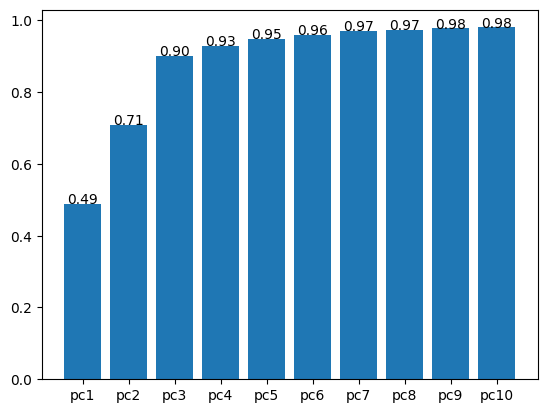

In [702]:
n_components = 10
pca = PCA(n_components=n_components).fit(data_scaled)

var_ratios_cum = np.tri(n_components) @ pca.explained_variance_ratio_
labels = [f"pc{i}" for i in range(1, n_components+1)]

plt.bar(labels, var_ratios_cum)
for i in range(n_components):
    plt.text(i, var_ratios_cum[i], f"{var_ratios_cum[i]:.2f}", ha='center')
# plt.bar(labels, pca.explained_variance_ratio_)

3 principal components capture 90% of the variance, while adding any additional components captures at most ~3%.

In [721]:
n_components = 5
pca = PCA(n_components=n_components).fit(data_scaled)

data_pca = pca.transform(data_scaled)
data_pca

array([[-0.93658195, -0.18261754,  0.43984241, -0.27128707, -0.1229034 ],
       [-1.36127324, -3.35640685, -3.91385896,  0.27018544,  0.59260376],
       [-0.93575092, -0.15277485,  0.47528802, -0.17290889, -0.14840006],
       ...,
       [-1.26828242,  4.39513518, -3.06901179, -0.52298367, -0.15559604],
       [-1.27434468,  4.71230434, -2.81488317,  0.73929535, -0.26123087],
       [-1.27229963,  4.82206904, -2.77585522,  0.67951655, -0.10989075]],
      shape=(6467, 5))

Clustering with `KMeans`

In [722]:
max_clusters = validation_df.genre_id.max() + 1
# From .5 - 1.5 times the number of genres
poss_clusters = range(8, max_clusters+9)

inertia = []
silhouette = []

for n_clusters in poss_clusters:
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=42
    ).fit(data_pca)
    
    labels = kmeans.predict(data_pca)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data_pca, labels))

kmeans_eval_df = pd.DataFrame({
    'n_clusters': poss_clusters,
    'inertia': inertia,
    'silhouette_score': silhouette
})

kmeans_eval_df

,n_clusters,inertia,silhouette_score
0,8,840.965911,0.753100
1,9,710.688039,0.753712
2,10,575.204732,0.746696
3,11,489.647365,0.748904
4,12,446.489997,0.715214
5,13,407.389605,0.630003
6,14,315.768609,0.512757
7,15,282.783347,0.484589
8,16,268.153950,0.467840
9,17,262.524585,0.459430


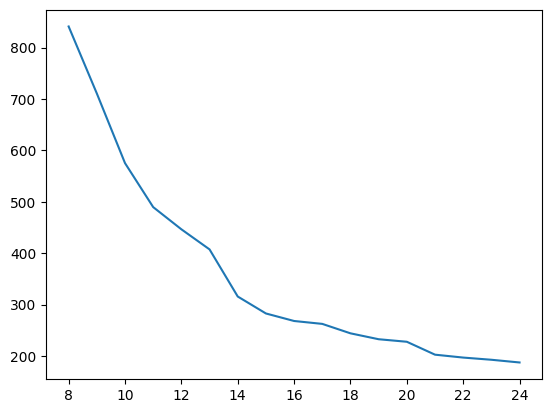

In [723]:
plt.plot(kmeans_eval_df.n_clusters, kmeans_eval_df.inertia)

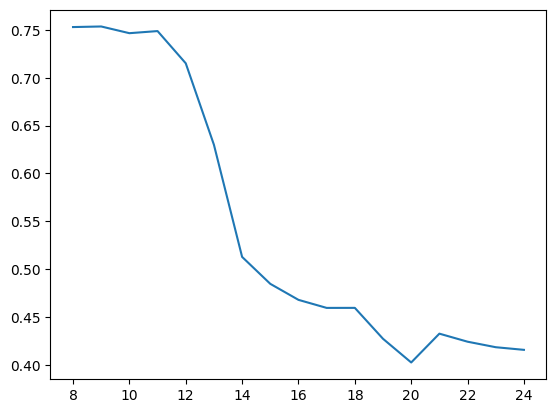

In [724]:
plt.plot(kmeans_eval_df.n_clusters, kmeans_eval_df.silhouette_score)